In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%%capture
!pip install geopandas

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import geopandas as gpd

In [4]:
ruta_Candarave = "/content/drive/MyDrive/2022 II/2. Sistema de información geográfica/Manzanas/CANDARAVE_TACNA_2302_Manzanas_Poblacion_JP_SuyoPomalia_geogpsperu_931381206.shp"
ruta_Jorge_Basadre="/content/drive/MyDrive/2022 II/2. Sistema de información geográfica/Manzanas/JORGE_BASADRE_TACNA_2303_Manzanas_Poblacion_JP_SuyoPomalia_geogpsperu_931381206.shp"
ruta_2301 ="/content/drive/MyDrive/2022 II/2. Sistema de información geográfica/Manzanas/TACNA_TACNA_2301_Manzanas_Poblacion_JP_SuyoPomalia_geogpsperu_931381206.shp"
ruta_2304="/content/drive/MyDrive/2022 II/2. Sistema de información geográfica/Manzanas/TARATA_TACNA_2304_Manzanas_Poblacion_JP_SuyoPomalia_geogpsperu_931381206.shp"

In [5]:
manzana_Candarave = gpd.read_file(ruta_Candarave)
manzana_Jorge_Basadre = gpd.read_file(ruta_Jorge_Basadre)
manzana_2301 = gpd.read_file(ruta_2301)
manzana_2304 = gpd.read_file(ruta_2304)

In [6]:
manzana_2304.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
distritos = gpd.read_file("/content/drive/MyDrive/2022 II/2. Sistema de información geográfica/Distritos/DISTRITOS_inei_geogpsperu_suyopomalia.shp")
distrito_Tacna = distritos[distritos["NOMBDIST"] == "TACNA"]
distrito_Tacna

,UBIGEO,OBJECTID,NOMBDEP,NOMBPROV,NOMBDIST,CAPITAL,POBTOTAL,POB_EDAD_T,POB_EDAD_E,DENSIDAD,...,MUJERES__3,HOMBRES_NA,HOMBRES__2,TOTAL_NACI,IND_121951,IND_122042,IND_122047,IND_516462,IND_516484,geometry
30,230101,31.0,TACNA,TACNA,TACNA,TACNA,100612.0,81227.0,69072.0,53.580292,...,727.0,51.273458,765.0,1492.0,1545.0,111371.85255,105122.71105,8462124.0,2307.0,"POLYGON ((-70.32555 -18.31251, -70.32580 -18.3..."


In [8]:
concat_manza = gpd.pd.concat([manzana_Candarave, 
                              manzana_Jorge_Basadre,
                              manzana_2301, 
                              manzana_2304])
concat_manza.to_file("manzanas_total.shp")

Se han truncado las últimas 5000 líneas del flujo de salida.


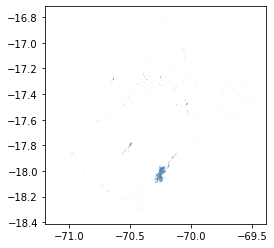

In [9]:
path = "/content/manzanas_total.shp"
manzanas_python = gpd.read_file(path)
manzanas_python.plot()

In [10]:
manzana_clip = manzanas_python.clip(distrito_Tacna)
manzana_clip.head()

,Mz,UBIGEO,AREA,CODCCPP,ZONA,MANZANA_ID,MANZANA_A,T_TOTAL,T_HOMBRES,T_MUJERES,LLAVE_MZS,contacto,descargar,whatsapp,NOMBDEP,NOMBPROV,IDPROV,ARCHIVO,geometry
6163,230111005000000,230111,2,0050,00000,None,None,21.0,13.0,8.0,230111005000000,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206.0,TACNA,TACNA,2301,TACNA_TACNA_2301_Manzanas_Poblacion_JP_SuyoPom...,"POLYGON ((-70.32686 -18.30021, -70.32679 -18.3..."
6478,230110000500000,230110,2,0005,00000,None,None,75.0,39.0,36.0,230110000500000,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206.0,TACNA,TACNA,2301,TACNA_TACNA_2301_Manzanas_Poblacion_JP_SuyoPom...,"POLYGON ((-70.29102 -18.18316, -70.29109 -18.1..."
5159,230110000102506049,230110,1,0001,02506,049,None,17.0,8.0,9.0,230110000102506049,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206.0,TACNA,TACNA,2301,TACNA_TACNA_2301_Manzanas_Poblacion_JP_SuyoPom...,"POLYGON ((-70.28928 -18.08895, -70.28931 -18.0..."
5309,230110000102506050,230110,1,0001,02506,050,None,1.0,1.0,0.0,230110000102506050,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206.0,TACNA,TACNA,2301,TACNA_TACNA_2301_Manzanas_Poblacion_JP_SuyoPom...,"POLYGON ((-70.28999 -18.08878, -70.28968 -18.0..."
4751,230110000102506053B,230110,1,0001,02506,053,B,5.0,0.0,5.0,230110000102506053B,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206.0,TACNA,TACNA,2301,TACNA_TACNA_2301_Manzanas_Poblacion_JP_SuyoPom...,"POLYGON ((-70.29161 -18.08908, -70.29248 -18.0..."


In [11]:
!pip install contextily
import contextily as ctx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 34.6 MB/s eta 0:00:00


In [12]:
ctx.providers

{'OpenStreetMap': {'Mapnik': {'url': 'https://tile.openstreetmap.org/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.Mapnik'},
  'DE': {'url': 'https://{s}.tile.openstreetmap.de/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.DE'},
  'CH': {'url': 'https://tile.osm.ch/switzerland/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'bounds': [[45, 5], [48, 11]],
   'name': 'OpenStreetMap.CH'},
  'France': {'url': 'https://{s}.tile.openstreetmap.fr/osmfr/{z}/{x}/{y}.png',
   'max_zoom': 20,
   'html_attribution': '&copy; OpenStreetMap France | &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap France | (C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.France'},
  'HOT': {'url': 'https://{s}.tile.openstreetmap.fr/hot/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, Tiles style by <a href="https://www.hotosm.org/" target="_blank">Humanitarian OpenStreetMap Team</a> hosted by <a href="https://openstreetmap.fr/" target="_blank">OpenStreetMap France</a>',
   'attribution': '(C) OpenStreetMap contributors, Tiles style by Humanitarian OpenStreetMap Team hosted by OpenStreetMap France',
   'name': 'OpenStreetMap.HOT'},
  'BZH': {'url': 'https://tile.openstreetmap.bzh/br/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, Tiles courtesy of <a href="http://www.openstreetmap.bzh/" target="_blank">Breton OpenStreetMap Team</a>',
   'attribution': '(C) OpenStreetMap contributors, Tiles courtesy of Breton OpenStreetMap Team',
   'bounds': [[46.2, -5.5], [50, 0.7]],
   'name': 'OpenStreetMap.BZH'},
  'BlackAndWhite': {'url': 'http://{s}.tiles.wmflabs.org/bw-mapnik/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'attribution': '(C) OpenStreetMap contributors',
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'name': 'OpenStreetMap.BlackAndWhite'}},
 'MapTilesAPI': {'OSMEnglish': {'url': 'https://maptiles.p.rapidapi.com/{variant}/{z}/{x}/{y}.png?rapidapi-key={apikey}',
   'html_attribution': '&copy; <a href="http://www.maptilesapi.com/">MapTiles API</a>, &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) MapTiles API, (C) OpenStreetMap contributors',
   'variant': 'en/map/v1',
   'apikey': '<insert your api key here>',
   'max_zoom': 19,
   'name': 'MapTilesAPI.OSMEnglish'},
  'OSMFrancais': {'url': 'https://maptiles.p.rapidapi.com/{variant}/{z}/{x}/{y}.png?rapidapi-key={apikey}',
   'html_attribution': '&copy; <a href="http://www.maptilesapi.com/">MapTiles API</a>, &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) MapTiles API, (C) OpenStreetMap contributors',
   'variant': 'fr/map/v1',
   'apikey': '<insert your api key here>',
   'max_zoom': 19,
   'name': 'MapTilesAPI.OSMFrancais'},
  'OSMEspagnol': {'url': 'https://maptiles.p.rapidapi.com/{variant}/{z}/{x}/{y}.png?rapidapi-key={apikey}',
   'html_attribution': '&copy; <a href="http://www.maptilesapi.com/">MapTiles API</a>, &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) MapTiles API, (C) OpenStreetMap contributors',
   'variant': 'es/map/v1',
   'apikey': '<ins

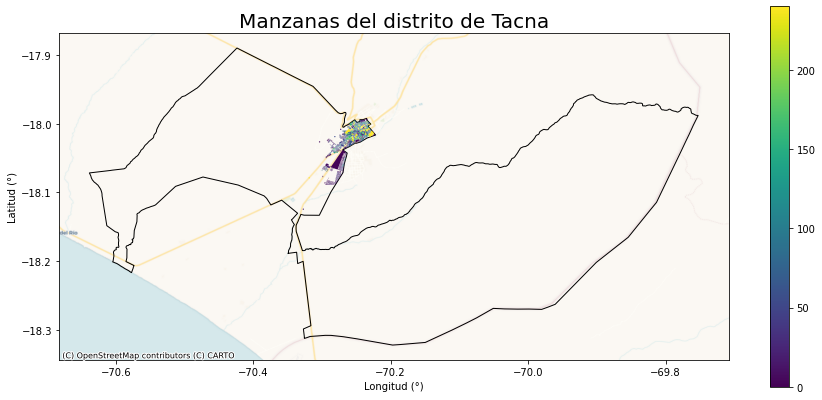

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
distrito_Tacna.plot(ax=ax,facecolor="none",edgecolor="black")
manzana_clip.plot(ax=ax, column="T_TOTAL",legend=True,vmin=0,vmax=240)
ax.set_ylabel("Latitud (°)")
ax.set_xlabel("Longitud (°)")
ax.set_title("Manzanas del distrito de Tacna",size=20)
ctx.add_basemap(ax, crs=distrito_Tacna.crs,source=ctx.providers.CartoDB.Voyager)

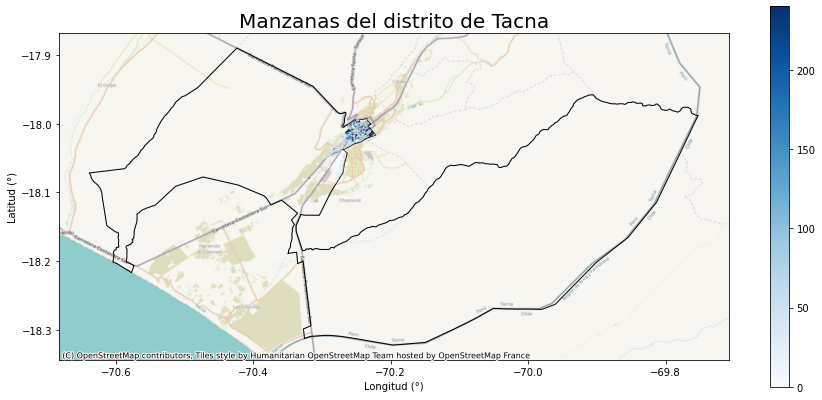

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
distrito_Tacna.plot(ax=ax,facecolor="none",edgecolor="black")
manzana_clip.plot(ax=ax, column="T_TOTAL",legend=True,vmin=0,vmax=240, cmap="Blues")
ax.set_ylabel("Latitud (°)")
ax.set_xlabel("Longitud (°)")
ax.set_title("Manzanas del distrito de Tacna",size=20)
ctx.add_basemap(ax, crs=distrito_Tacna.crs,source=ctx.providers.OpenStreetMap.HOT)

(-18.1, -17.95)

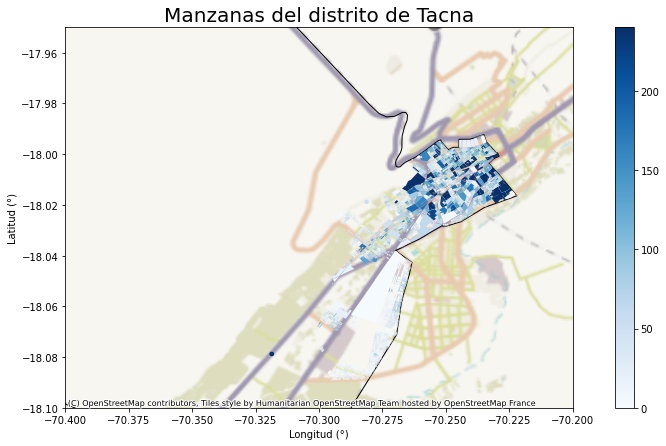

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
distrito_Tacna.plot(ax=ax,facecolor="none",edgecolor="black")
manzana_clip.plot(ax=ax, column="T_TOTAL",legend=True,vmin=0,vmax=240, cmap="Blues")
ax.set_ylabel("Latitud (°)")
ax.set_xlabel("Longitud (°)")
ax.set_title("Manzanas del distrito de Tacna",size=20)
ctx.add_basemap(ax, crs=distrito_Tacna.crs,source=ctx.providers.OpenStreetMap.HOT)
minx, miny, maxx, maxy = -70.4, -18.1, -70.2, -17.95
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)